In [2]:
import numpy as np
from tools import load, split, estimate_derivative, train, test
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
file_train = 'mix_100_20_1'
file_test = 'mix_50_20_1'
cm = ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'])

train_data, train_sequence, train_times_sec, train_sequence_sec = load(file_train, reduced=True)
test_data, test_sequence, test_times_sec, test_sequence_sec = load(file_test, reduced=True)

In [4]:
X_train = []
Y_train = []
I_train = []

for i, t in enumerate(train_sequence_sec):
    try:
        flags = (train_times_sec > train_sequence_sec[i]) & (train_times_sec < train_sequence_sec[i+1])
    except IndexError:
        flags = (train_times_sec > train_sequence_sec[i])
    sample = train_data[flags][:18]
    t_sample = train_times_sec[flags][:18]

    x0 = sample[0, :]
    t0 = t_sample[0]
    int = np.zeros((sample.shape[1]))
    for k in range(1, sample.shape[0]):
        dif = np.abs(sample[k, :] - x0)/(t_sample[k] - t0)
        int += dif
    if len(sample.flatten()) == 144:
        X_train.append(sample.flatten())
        Y_train.append(train_sequence[i][1]-1)
        I_train.append(int)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
I_train = np.array(I_train)

In [5]:
X_test = []
Y_test = []
I_test = []

for i, t in enumerate(test_sequence_sec):
    try:
        flags = (test_times_sec > test_sequence_sec[i]) & (test_times_sec < test_sequence_sec[i+1])
    except IndexError:
        flags = (test_times_sec > test_sequence_sec[i])
    sample = test_data[flags][:18]
    t_sample = test_times_sec[flags][:18]

    x0 = sample[0, :]
    t0 = t_sample[0]
    int = np.zeros((sample.shape[1]))
    for k in range(1, sample.shape[0]):
        dif = np.abs(sample[k, :] - x0)/(t_sample[k] - t0)
        int += dif
    if len(sample.flatten()) == 144:
        X_test.append(sample.flatten())
        Y_test.append(test_sequence[i][1]-1)
        I_test.append(int)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
I_test = np.array(I_test)

              precision    recall  f1-score   support

           0       0.85      0.46      0.60        50
           1       0.72      0.84      0.78        50
           2       0.83      0.68      0.75        50
           3       0.85      0.90      0.87        50
           4       0.54      1.00      0.70        50
           5       0.90      0.52      0.66        50

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.73       300
weighted avg       0.78      0.73      0.73       300



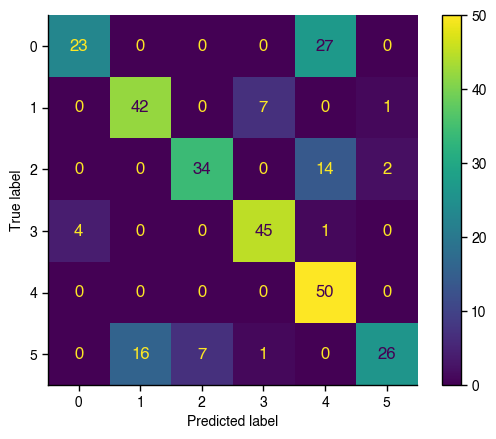

In [6]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
print(metrics.classification_report(Y_test, Y_pred))

In [9]:
param_grid = {
    'kernel': ['rbf'],
    'C': np.linspace(30, 80., num=10),
    'gamma': ['scale'],
}
clf = GridSearchCV(svm.SVC(), param_grid)
clf.fit(X_train, Y_train)
results = clf.cv_results_
print(np.array(results['params'])[results['mean_test_score'] == clf.best_score_])
print(np.array(results['mean_test_score'])[results['mean_test_score'] == clf.best_score_])

[{'C': np.float64(41.111111111111114), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(46.666666666666664), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(52.22222222222222), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(57.77777777777778), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(63.33333333333333), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(68.88888888888889), 'gamma': 'scale', 'kernel': 'rbf'}
 {'C': np.float64(74.44444444444444), 'gamma': 'scale', 'kernel': 'rbf'}]
[0.83610644 0.83610644 0.83610644 0.83610644 0.83610644 0.83610644
 0.83610644]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      0.78      0.88        50
           2       0.85      1.00      0.92        50
           3       0.81      0.92      0.86        50
           4       1.00      0.98      0.99        50
           5       1.00      0.84      0.91        50

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



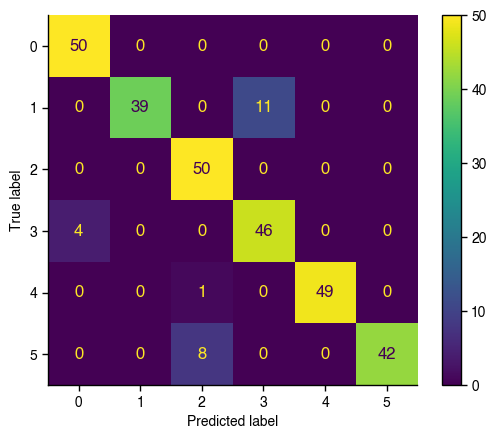

In [8]:
clf = svm.SVC(kernel='rbf', C=50, gamma='scale')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
print(metrics.classification_report(Y_test, Y_pred))